# Decision Trees and Boosting

In the following code tutorial we will cover an overview of how we can construct basic decision tree. We will specifically look at visualising the process of constructure a regression decision tree (as I think they are the least intuitive to visualise in comparison to classification trees). To do this we will be creating some random data that loosely represents a sinusoidal curve. 

In [1]:
# Import the necessary modules and libraries for this package
!conda install numpy -y
!conda install scikit-learn -y
!conda install seaborn -y
!conda install matplotlib -y

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at C:\Users\Oliver\Anaconda3\envs\testNew:
#
numpy                     1.13.1                   py36_0  
Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at C:\Users\Oliver\Anaconda3\envs\testNew:
#
scikit-learn              0.19.0              np113py36_0  
Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at C:\Users\Oliver\Anaconda3\envs\testNew:
#
seaborn                   0.8                      py36_0  
Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at C:\Users\Oliver\Anaconda3\envs\testNew:
#
matplotlib                2.0.2               np113py36_0  


In [2]:
# Now import these packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Create a non noisy sine wave first
rng = np.random.RandomState(434)
x = np.sort(rng.uniform(0,2*np.pi,size=100 ),axis=0)
y = np.sin(x)

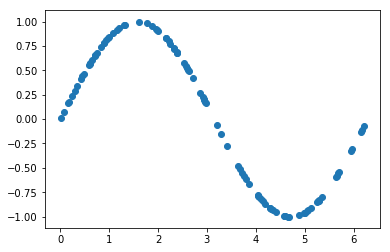

In [3]:
# and let's plot it to check
plt.scatter(x=x,y=y)
plt.show()

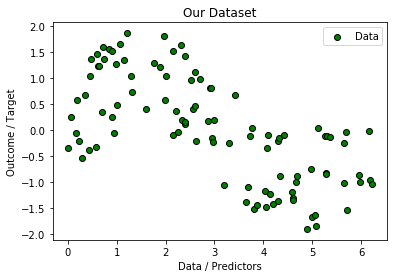

In [4]:
# now lets add some random noise
y += rng.uniform(1,-1,100)

# and plot the response
plt.scatter(x=x,y=y,edgecolor="black",
            c="green", label="Data")
plt.xlabel("Data / Predictors")
plt.ylabel("Outcome / Target")
plt.title("Our Dataset")
plt.legend()
plt.show()

We will now be constructing a decision tree regression  model. To do this we will construct a decision tree first with a max depth of 1, i.e. we will have one split in our tree leading to two branches. We will then sequentially increase the number of branches by increasing the depth from 1 to 2 to 3. Each time we will plot out the **actual** tree. This will show us the criteria with which the model has chosen to split the data, highlihgting the mean in the new section of data, the new mean standard error in the section of the data that is captured by the new split, and how many samples fall within this split. 

This requires installing graphviz...

#### Graphviz troubleshoot help. 

TLDR; 

1. Either download the environment yml from our [CLDS anaconda cloud page](https://anaconda.org/clds/pushingTrees) and create a new environment with this, and skip these install steps. 
2. Or plod through the following, which **does** work, but can be painful. 
3. Skip the decision tree drawing by commenting out the required code

---
In order to plot the **actual** tree we will need to install a couple extra modules that are notoriously difficult to get to install (took me about 3 differnet times to figure out the correct order, so don't worry if it doesn't work, but hopefully from this notebook the images will show the decision trees I am trying to describe.

1. First install the graphviz software by going to their [downloads page](https://www.graphviz.org/download/), and install your operating systems version.
2. Make sure to add this to your system path. E.g. on windows add something like this to your Environment Variables PATH C:\Program Files (x86)\Graphviz2.38\bin
3. Continue to install the required packages.

**N.B.** The following packages install a little slowly (lots of graphic programs etc), so might i recommend installing it using terminal. To do this go back to anaconda navigator, click on green play symbol by your environment that you are working within and launch terminal. From there just run the following commands:

```
conda install -c anaconda graphviz # this is the actual package that connects the c code 
conda install -c python-graphviz # this is the python wrapping package for it
```

Doing this in terminal is a little quicker and you can at least see the install prompts so you can be more sure that it is happening. 

In [6]:
!conda install -c anaconda graphviz -y
!conda install -c anaconda python-graphviz -y

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at C:\Users\Oliver\Anaconda3\envs\testNew:
#
graphviz                  2.38.0                        4    anaconda
Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at C:\Users\Oliver\Anaconda3\envs\testNew:
#
python-graphviz           0.5.2                    py36_0    anaconda


In [7]:
# then import graphviz
import graphviz

## we will also need the tree class from sklearn
from sklearn import tree

In [82]:
## We are going to use this to install a package called anaconda-client using conda install
!conda install anaconda-client -y

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at C:\Users\Oliver\Anaconda3\envs\testNew:
#
anaconda-client           1.6.3                    py36_0  


In [83]:
# we use the conda command to export our environment "testNew" and save it as "cldsforall.yml"
!conda env export -n testNew -f pushingTrees.yml

In [8]:
# Fit regression model
X = x.reshape(-1,1)

# we'll plot one outside the foor loop so you see the decision tree
i = 1
# create the model with the desired max depth
regression_model = DecisionTreeRegressor(max_depth=i)
regression_model.fit(X, y)

# Predict using this model 
y_predict = regression_model.predict(X)


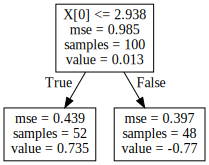

In [9]:
# COMMENT THIS OUT/DO NOT RUN IF YOU DO NOT HAVE GRAPHVIZ
dot_data = tree.export_graphviz(regression_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

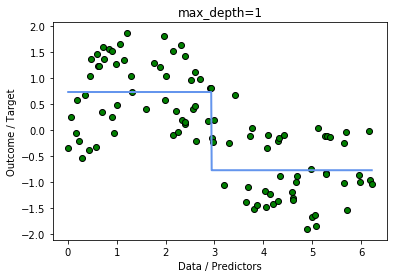

In [10]:
# now plot the fit
plt.scatter(x=x,y=y,edgecolor="black",
            c="green", label="Data")
plt.plot(x, y_predict, color="cornflowerblue",
             label=f'max_depth={i}', linewidth=2)
plt.xlabel("Data / Predictors")
plt.ylabel("Outcome / Target")
plt.title(f'max_depth={i}')
plt.show()

What you can see is that the first split has occurred at 2.938. This was chosen as it represented the best minimisation of the mse for out 100 sample, which makes sense as we would expect the split for a sine wave to be at 3.14 (so the extra noise has slightly moved that).

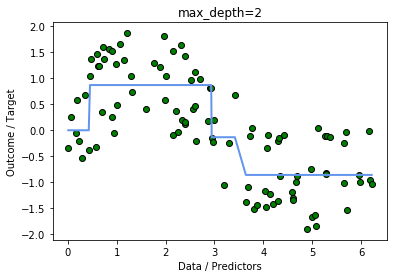

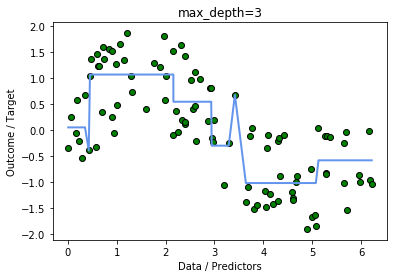

In [11]:
for i in range(2,4):

    # create the model with the desired max depth
    regression_model = DecisionTreeRegressor(max_depth=i)
    regression_model.fit(X, y)

    # Predict using this model 
    y_predict = regression_model.predict(X)

    # COMMENT THIS OUT/DO NOT RUN IF YOU DO NOT HAVE GRAPHVIZ
    # create the tree to be plotted
    dot_data = tree.export_graphviz(regression_model, out_file=None) 
    graph = graphviz.Source(dot_data) 
    # --------------------------------------------------------

    # now plot the fit
    plt.scatter(x=x,y=y,edgecolor="black",
                c="green", label="Data")
    plt.plot(x, y_predict, color="cornflowerblue",
                 label=f'max_depth={i}', linewidth=2)
    plt.xlabel("Data / Predictors")
    plt.ylabel("Outcome / Target")
    plt.title(f'max_depth={i}')
    plt.show()

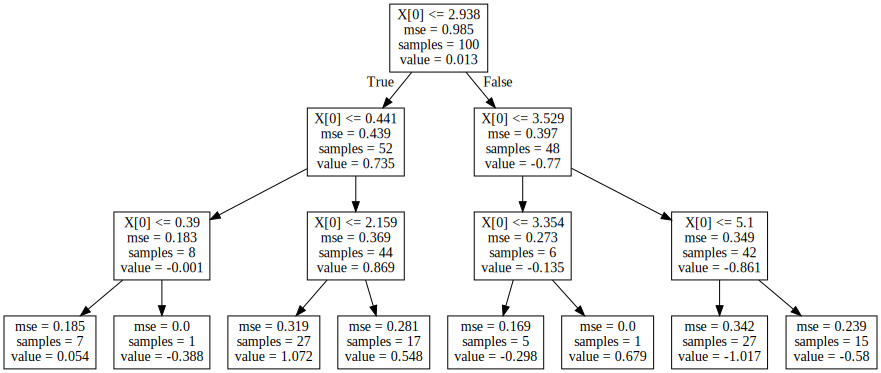

In [12]:
## Likewise this will not work without graphviz
graph

As you can see after each new depth is added, a new split point is added that allows the tree to better fit the data. If we increase this to say 50, we will see a much better fit to out data. What you will see is this now fits the data perfectly, which is what we would expect - there were 100 data points so 50 potential splits should easily be able so correctly predict each point, with a split being able to distinguish between 2 points. 

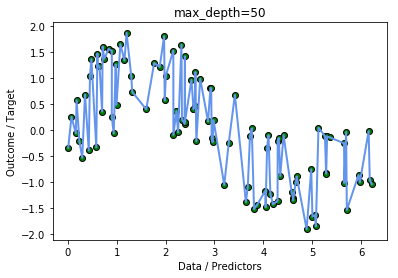

In [13]:
i = 50

# create the model with the desired max depth
regression_model = DecisionTreeRegressor(max_depth=i)
regression_model.fit(X, y)

# Predict using this model 
y_predict = regression_model.predict(X)

# now plot the fit
plt.scatter(x=x,y=y,edgecolor="black",
            c="green", label="Data")
plt.plot(x, y_predict, color="cornflowerblue",
             label=f'max_depth={i}', linewidth=2)
plt.xlabel("Data / Predictors")
plt.ylabel("Outcome / Target")
plt.title(f'max_depth={i}')
plt.show()

## Boosted regression tree from scratch

The following code is quite indepth for this session so will hopefully give you something to look at after this meetup as well, or give some extension for those who are more familiar with the topic.

I will pay credit for this code to [Prince Grover](https://www.kaggle.com/grroverpr/gradient-boosting-simplified/). It's a beautiful intro to gradient boosting, which I have adapted for the followign section by adding in extra comments to help explian the code and descrfiibe what each class function is doing.

To begin with we will create a decision tree class. This class is similar to the one on the sklearn, but is really excellent as it strips back to just what is needed for displaying gradient boosting and can show neatly how the decision tree works out the best place to split the dataset, which touches on the material we just covered when looking at the graphical respresentation of the decision tree.

A brief word on using classes in python. Classes are a fantastic tool, and help start moving your programming forwards. They emplot object-orientated concepts, which is a fancy way of saying that rather than writing a code file with a list of variables and then functions that will use those variables, we will assign these variables a functions within a class. By doing this we help contain the functionality we require in one place, and it helps us to build more reliable code.

In [23]:
# std_agg is 1/n of the sum of sqquares error. Don't worry about this too much,
# but it simply allows for the error in the lhs and rhs of a tree split to be calculated
# within find_better_split
import math
def std_agg(cnt, s1, s2): return ((s2/cnt) - (s1/cnt)**2)

class DecisionTree():
    
    # Initialisation function. Classes require an initialisation function, which is called everytime you call a new 
    # DecisionTree() object. 
    
    # Our decision tree, within the DecisionTree() class refers to tself as self, so when we are declaring self.x = x
    # we are simply assigning the DecisionTree's x values to be equal to the x argument we provide. For a decision tree
    # this will be our input data.
    def __init__(self, x, y, idxs = None, min_leaf=2):
        if idxs is None: idxs=np.arange(len(y)) # to begin with we have not assigned any input data to split sides
        self.x,self.y,self.idxs,self.min_leaf = x,y,idxs,min_leaf
        self.n,self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit() # find an initial split
        
    # Find a better split given the current splits 
    # To do this go through each tree and work out the new error in the proposed tree
    # as defined by the provided var_idx argument. 
    
    # When this function is called from find_varsplit this will go through each x point 
    # (self.c is equal to 1, i.e. the number of x points.) and find the best split for this point.
    # If the split is better than any previous splits it will update the split that occured. This 
    # occurs by working out which y_i has the greatest residual.   
    def find_better_split(self, var_idx):
        x,y = self.x.values[self.idxs,var_idx], self.y[self.idxs]
        sort_idx = np.argsort(x)
        sort_y,sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf-1):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.min_leaf or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi
    
    # find where to split a tree into two new decision trees, i.e. where to split a branch 
    def find_varsplit(self):
        for i in range(self.c): self.find_better_split(i)
        if self.score == float('inf'): return
        x = self.split_col
        lhs = np.nonzero(x<=self.split)[0]
        rhs = np.nonzero(x>self.split)[0]
        self.lhs = DecisionTree(self.x, self.y, self.idxs[lhs])
        self.rhs = DecisionTree(self.x, self.y, self.idxs[rhs])

    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf')
    
    # __repr__ is a specific function within classes describing what the string representation for a class should be
    def __repr__(self):
        s = f'n: {self.n}; val:{self.val}'
        if not self.is_leaf:
            s += f'; score:{self.score}; split:{self.split}; var:{self.split_name}'
        return s

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)

We will now set up our dataset. This will take the form of some kind of noisy multilevel digital signal

In [15]:
# create our predictor values
x = np.arange(0,50)
x = pd.DataFrame({'x':x})

In [33]:
# just random uniform distributions in differnt ranges to descirbe our multivel digital signal

y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

# concatenate these to create our output data, i.e. what we are trying to predict with x
y = np.concatenate((y1,y2,y3,y4,y5))
y = y[:,None]

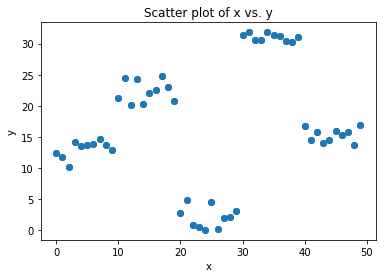

In [34]:
# quickly have a look at this data

plt.scatter(x,y)
plt.plot(x,y, 'o')
plt.title("Scatter plot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

We will now run a loop. On the first iteration we will create a decision tree, using x to predict y, by predicting yi. On every iteration after this we will create a new tree, which will try to predict the error (y - yi) using x. This will create a new set of predictions yi_2, yi_3 etc, which will be sequentially added to our original prediction. Because these trees are fitted to the sequential error, their predictions represent how we would minimise the error in the previous prediction. 

If that's a bit blurry, have a look at the starting plots, looking at the residual plots and trying to match them up to the errors in our predictions. 

In [80]:
xi = x # initialization of input
yi = y # initialization of target
# x,y --> use where no need to change original y
ei = 0 # initialization of error
n = len(yi)  # number of rows
predf = 0 # initial prediction 0

for i in range(20): # like n_estimators
    
    # find our initial tree. On iteration 1 this will create the first split to the dataset.
    # After the fist iteration, it will use the new yi which is the error from the previous tree
    # and again trigger finding the best split within this by calling find_varsplit first as 
    # this tree is created, which in turn triggers find_better_split
    tree = DecisionTree(xi,yi)
    
    # where was that split
    r = np.where(xi == tree.split)[0][0]    
    
    left_idx = np.where(xi <= tree.split)[0]
    right_idx = np.where(xi > tree.split)[0]
    
    # what is the mean either side of the split, as this will then be how much we correct our prediciton by
    predi = np.zeros(n)
    np.put(predi, left_idx, np.repeat(np.mean(yi[left_idx]), r))  # replace left side mean y
    np.put(predi, right_idx, np.repeat(np.mean(yi[right_idx]), n-r))  # right side mean y
    
    predi = predi[:,None]  # make long vector (nx1) in compatible with y
    predf = predf + predi  # final prediction will be previous prediction value + new prediction of residual
    
    ei = y - predf  # needed originl y here as residual always from original y    
    yi = ei # update yi as residual to reloop
    
    
    # plotting after prediction
    xa = np.array(x.x) # column name of x is x 
    order = np.argsort(xa)
    xs = np.array(xa)[order]
    ys = np.array(predf)[order]
    
    #epreds = np.array(epred[:,None])[order]

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (13,2.5))

    ax1.plot(x,y, 'o')
    ax1.plot(xs, ys, 'r')
    ax1.set_title(f'Prediction (Iteration {i+1})')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y / y_pred')

    ax2.plot(x, ei, 'go')
    ax2.set_title(f'Residuals vs. x (Iteration {i+1})')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Residuals')

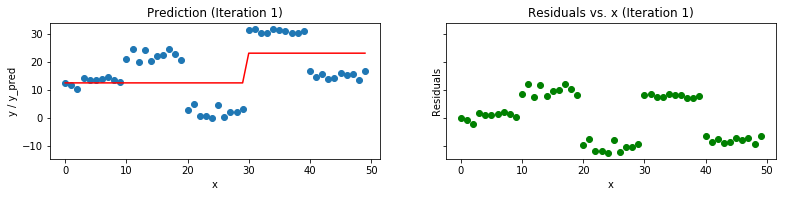

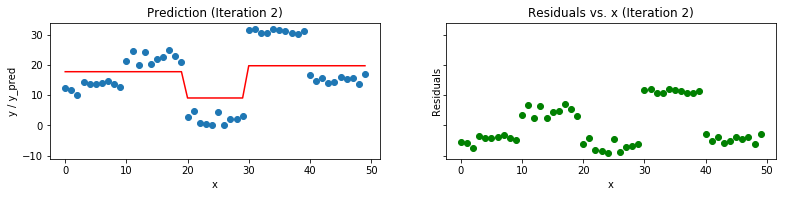

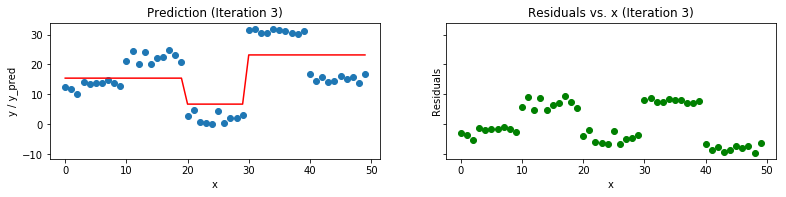

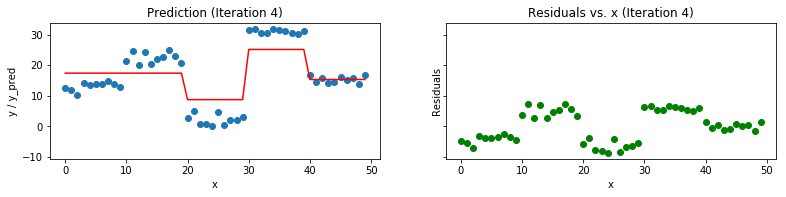

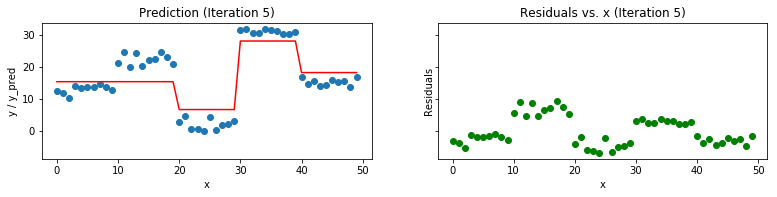

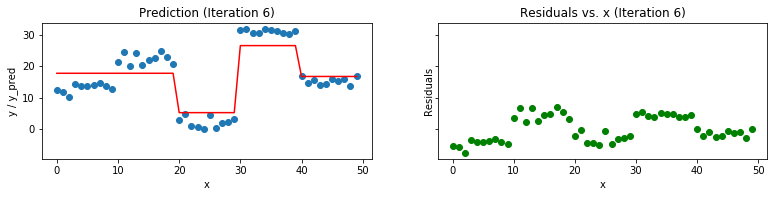

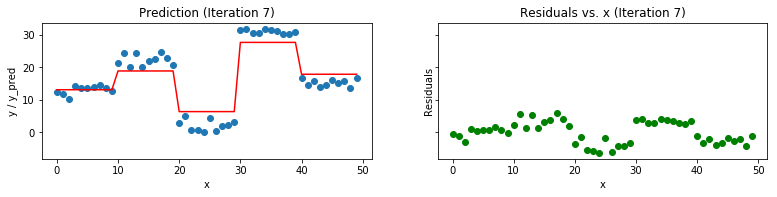

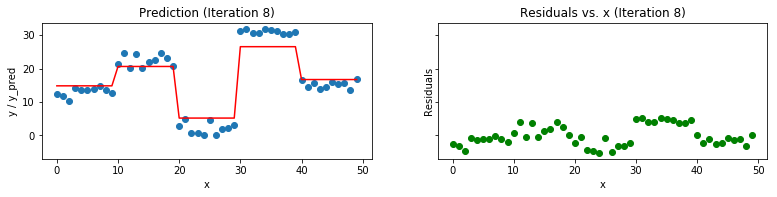

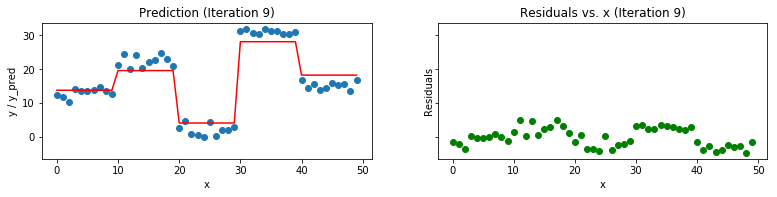

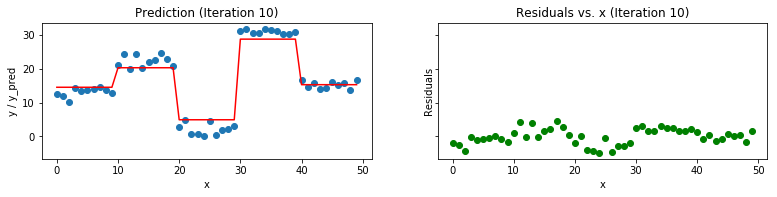

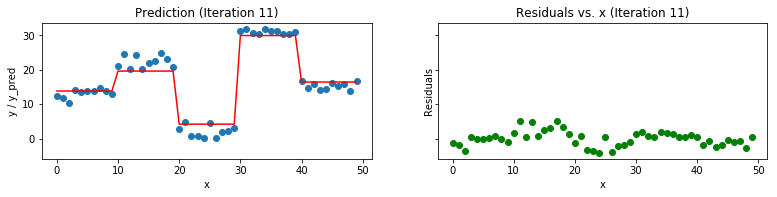

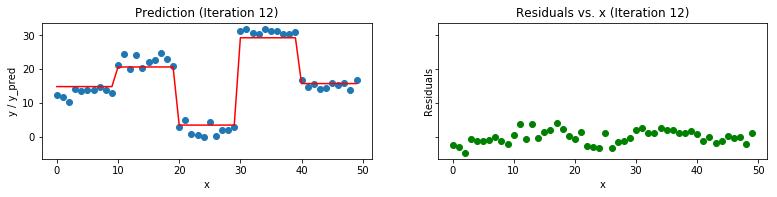

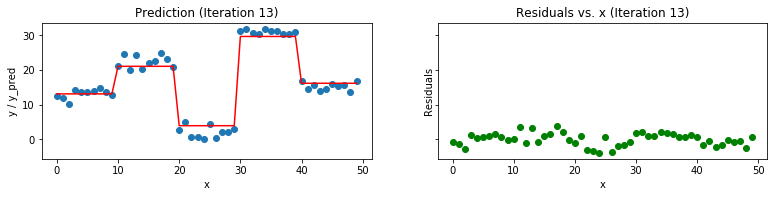

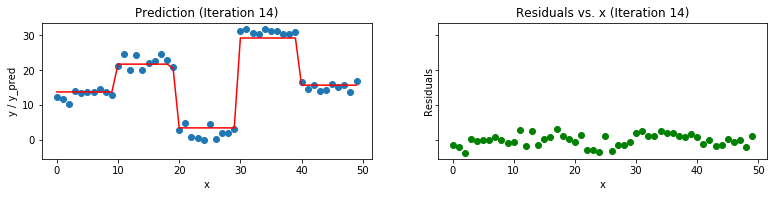

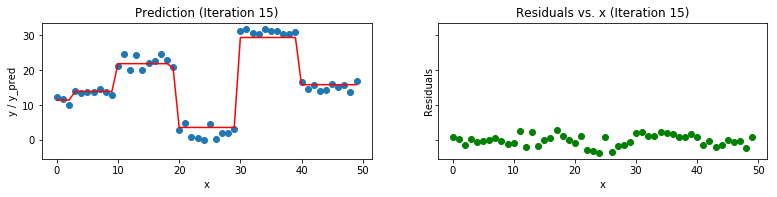

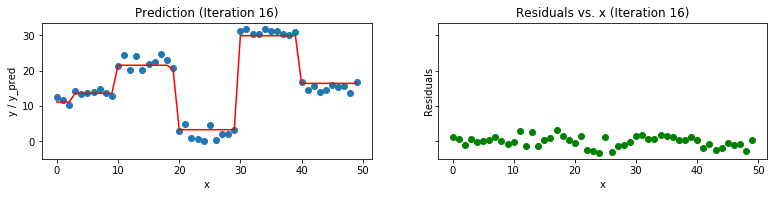

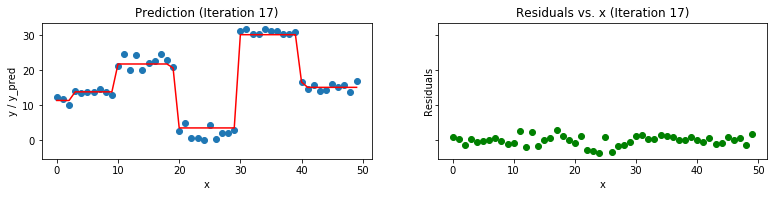

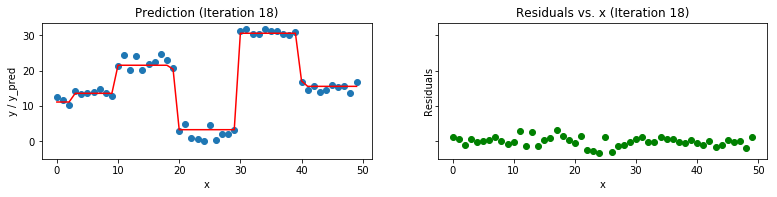

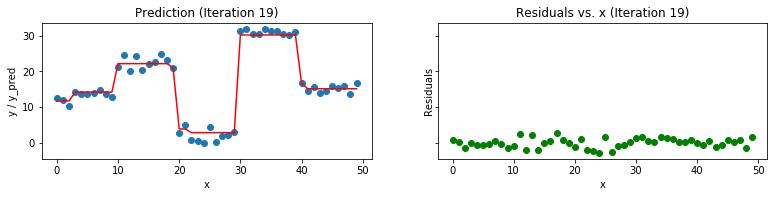

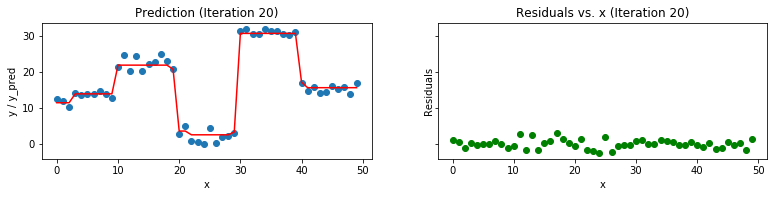

In [81]:
plt.show()

## Wrapping Up

I know there was a slight jump at the end of this tutorial, and don't worry. I have spent a day or so getting my head around how this works, so it's a lot to ask to expect for it to make sense in the hour and half we have each meetup. So please spend the time going over it afterwards. Ultimately if you take the following away then that's great:

1. Trees are supervised machine learning methods to use labelled input or predictor values to make predictions.
2. Classification trees will make discrete predictions, i.e. what animal type is this using input data such as vertebrate, warm blooded etc.
3. Regresion trees will make continuos predictions, i.e. what is the y value at this x value for a sine wave.
4. When fitting trees, we can add more complexity by adding more branches and have deeper trees. 
5. To work out how to build better trees we can create independent, uncorrelated samples from our input data and combine their predictions via **bagging** to create better predicitions. This is good as it will reduce overfitting as the samples in each tree are random.
5. Another way is to use the error from our first tree to inform our next tree, by training our subsequent tree on the error. This next trained tree will predict how to change our initial prediction using the output of this tree. By sequentially carrying out this process we will create an increasingly better tree. This is what we did above using our **gradient boosted** tree. 
6. **BEWARE** - Gradient boosting will eventually lead to overfitting (above there isn't much change between iteration 15 and 20 for example)
